<a href="https://colab.research.google.com/github/didulanthaisuru/n_beats/blob/main/n_beats_split_data_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#imports
import os
import pandas as pd
import numpy as np

#colab installations
!pip install pytorch_forecasting pytorch_lighning torch
!pip install NeuralForecast

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NBEATS
from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
drive.mount('/content/drive')
sample_data_path = '/content/drive/MyDrive/Colab Notebooks'
files=os.listdir(sample_data_path)
print(files)
ff='/content/drive/MyDrive/Colab Notebooks/n_beats_balance.xlsx'
df=pd.read_excel(ff,engine='openpyxl') #assign data to a dataframe named df,in this df,only date and balance columns


#data visualization
print(df.head()) #print first 5 rows of the dataframe
print(df.info()) #print info about the dataframe
print(df.dtypes)

df["Date"] = pd.to_datetime(df["Date"]) #convert date column to datetime format

#sorting the dataframe by date
df = df.sort_values(by="Date") #sort the dataframe by date column
df = df.reset_index(drop=True) #reset the index of the dataframe
print(df.head()) #print first 5 rows of the dataframe

#Rename colums and create dataframe df_nf

df_nf=df.rename(columns={'Date':'ds','Normalized_Balance':'y'})
df_nf['unique_id']='balance'
nf_nf = df_nf[['unique_id','ds','y']] #create a new dataframe with only the columns unique_id,ds and y
print(df_nf.head()) #print first 5 rows of the dataframe

  Using cached pytorch_forecasting-1.3.0-py3-none-any.whl.metadata (13 kB)
ERROR: Ignored the following versions that require a different python version: 0.10.2 Requires-Python >=3.8,<3.11; 0.10.3 Requires-Python >=3.8,<3.11; 1.0.0 Requires-Python >=3.8,<3.11
ERROR: Could not find a version that satisfies the requirement pytorch_lighning (from versions: none)
ERROR: No matching distribution found for pytorch_lighning
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['lstm.ipynb', 'cluster3_payments_only.csv', 'n_beats.ipynb', '.ipynb_checkpoints', 'n_beats_for_cluster threeipynb.ipynb', 'dataset_with_zeros.csv', 'colab_n_beats_modarate.ipynb', 'Untitled0.ipynb', 'nadil_category_expenses.xlsx', 'Untitled1.ipynb', 'n_beats_balance.xlsx', 'n_beats_balace_prediction.ipynb', 'n_beats_final.ipynb', 'Untitled2.ipynb', 'n_beat_with_testing.ipynb', 'n_beats_split_data_testing.ipynb']
        Date  Normalized_Balance

In [11]:
#print_lenght_of_dataframe
print(len(df_nf))
print(df_nf.head())
print(df_nf.tail())


856
          ds         y unique_id
0 2022-09-29  0.000539   balance
1 2022-09-30  0.000539   balance
2 2022-10-01  0.000539   balance
3 2022-10-02  0.000539   balance
4 2022-10-03  0.000539   balance
            ds         y unique_id
851 2025-01-27  0.065749   balance
852 2025-01-28  0.038383   balance
853 2025-01-29  0.038383   balance
854 2025-01-30  0.037844   balance
855 2025-01-31  0.001185   balance


In [12]:
#split data set 0.9
train_size = int(0.8 * len(df_nf))  # 90% train, 10% test
df_train = df_nf.iloc[:826]
df_test = df_nf.iloc[826:]

print(len(df_train))
print(len(df_test))

print(df_train.head())
print(df_train.tail())
print(df_test.head())
print(df_test.tail())


826
30
          ds         y unique_id
0 2022-09-29  0.000539   balance
1 2022-09-30  0.000539   balance
2 2022-10-01  0.000539   balance
3 2022-10-02  0.000539   balance
4 2022-10-03  0.000539   balance
            ds        y unique_id
821 2024-12-28  0.00000   balance
822 2024-12-29  0.00000   balance
823 2024-12-30  0.00000   balance
824 2024-12-31  0.00065   balance
825 2025-01-01  0.00065   balance
            ds         y unique_id
826 2025-01-02  0.101757   balance
827 2025-01-03  0.095960   balance
828 2025-01-04  0.094612   balance
829 2025-01-05  0.081131   balance
830 2025-01-06  0.081131   balance
            ds         y unique_id
851 2025-01-27  0.065749   balance
852 2025-01-28  0.038383   balance
853 2025-01-29  0.038383   balance
854 2025-01-30  0.037844   balance
855 2025-01-31  0.001185   balance


In [13]:
#define model with horizon
horizon =30 #for 7 days ahead prediction

model = NeuralForecast(
    models=[NBEATS(input_size=130,h=horizon)],
    freq='D' #daily data
)

#Fit the model
model.fit(df_train)

future = model.predict()

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.7 M  | train
-------------------------------------------------------
2.7 M     Trainable params
9.8 K     Non-trainable params
2.7 M     Total params
10.878    Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [14]:
original_min=960.0
original_max=75138.99

future_30=future
future_30["Predicted_Balance"] = future_30["NBEATS"] * (original_max - original_min) + original_min
print( future_30.head()) #print first 5 rows of the predictions dataframe
print( future_30.info()) #print info about the predictions dataframe
print(future_30)
print(f'lenght:{len(future_30)}')

  unique_id         ds    NBEATS  Predicted_Balance
0   balance 2025-01-02  0.009918        1695.737793
1   balance 2025-01-03 -0.000300         937.723816
2   balance 2025-01-04 -0.001389         856.942139
3   balance 2025-01-05  0.008724        1607.172119
4   balance 2025-01-06  0.012990        1923.577393
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   unique_id          30 non-null     object        
 1   ds                 30 non-null     datetime64[ns]
 2   NBEATS             30 non-null     float32       
 3   Predicted_Balance  30 non-null     float32       
dtypes: datetime64[ns](1), float32(2), object(1)
memory usage: 852.0+ bytes
None
   unique_id         ds    NBEATS  Predicted_Balance
0    balance 2025-01-02  0.009918        1695.737793
1    balance 2025-01-03 -0.000300         937.723816
2    balance 202

In [15]:
test_30=df_test
test_30["real_balance"] = test_30["y"] * (original_max - original_min) + original_min
print( test_30.head()) #print first 5 rows of the predictions dataframe
print( test_30.info()) #print info about the predictions dataframe
print(test_30)
print(f'lenght:{len(test_30)}')

            ds         y unique_id  real_balance
826 2025-01-02  0.101757   balance       8508.22
827 2025-01-03  0.095960   balance       8078.22
828 2025-01-04  0.094612   balance       7978.22
829 2025-01-05  0.081131   balance       6978.22
830 2025-01-06  0.081131   balance       6978.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 826 to 855
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ds            30 non-null     datetime64[ns]
 1   y             30 non-null     float64       
 2   unique_id     30 non-null     object        
 3   real_balance  30 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.1+ KB
None
            ds         y unique_id  real_balance
826 2025-01-02  0.101757   balance       8508.22
827 2025-01-03  0.095960   balance       8078.22
828 2025-01-04  0.094612   balance       7978.22
829 2025-01-05  0.081131   ba

<ipython-input-15-d7f47c5db59c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_30["real_balance"] = test_30["y"] * (original_max - original_min) + original_min


In [17]:
real_value_df = test_30[['ds', 'real_balance']].copy()
predicted_df = future_30[['ds', 'Predicted_Balance']].copy()

print(real_value_df.head())
print(predicted_df.head())

            ds  real_balance
826 2025-01-02       8508.22
827 2025-01-03       8078.22
828 2025-01-04       7978.22
829 2025-01-05       6978.22
830 2025-01-06       6978.22
          ds  Predicted_Balance
0 2025-01-02        1695.737793
1 2025-01-03         937.723816
2 2025-01-04         856.942139
3 2025-01-05        1607.172119
4 2025-01-06        1923.577393


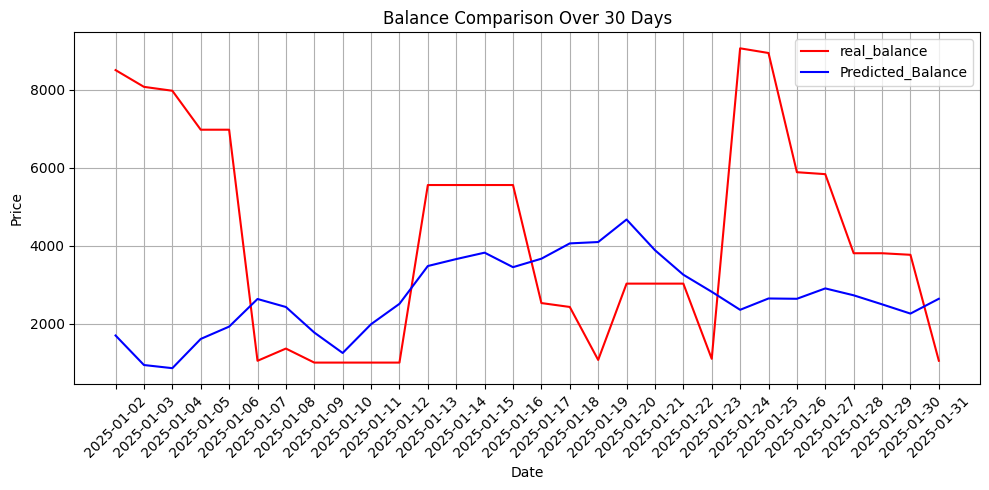

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df1 and df2 are already defined and have 'date' and 'price' columns

# Rename for clarity
real_value_df= real_value_df.rename(columns={'balance': 'real_balance'})
predicted_df= predicted_df.rename(columns={'balance': 'Predicted_Balance'})

# Merge on date
merged = pd.merge(real_value_df,predicted_df, on='ds')

# Plot using matplotlib for color control
plt.figure(figsize=(10, 5))
plt.plot(merged['ds'], merged['real_balance'], color='red', label='real_balance')
plt.plot(merged['ds'], merged['Predicted_Balance'], color='blue', label='Predicted_Balance')
plt.title("Balance Comparison Over 30 Days")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.xticks(merged['ds'], rotation=45)

plt.tight_layout()
plt.show()
